<a href="https://colab.research.google.com/github/camilorp5/Proyecto-TalentoTech/blob/main/Concatenacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concatenación de los datos

El proceso de concatenación de bases de datos tuvo cómo base los siguientes pasos:


1.   **Escogencia de los datos**: Para obtener una buena visualización de los datos, y lograr el análisis adecuado de estos, hemos escogido los días primero de cada mes a lo largo de los años 2019 al 2024.
2.   **Descarga**: Hemos escogido una fuente de Datos Abiertos, sin embargo, tuvimos que descargar cada dia en un csv por serparado. Fuente:
https://www.simem.co/datadetail/2bff145f-a233-4644-b5eb-74188dfba51c
3.   **Concatenación**: Realizamos una concatenación anual y luego otra sobre las bases de datos de cada año (para evitar sobrecarga del collab omitimos la primera concatenación).
4.   **Continuación**: Posteriormente procedemos a hacer uso de funciones de estadística descriptiva, limpieza y visualización de los datos.




In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Una vez importadas las librerías `numpy` y `pandas`, y ya conectados al `Google Drive` definimos un path de entrada y uno de salida. Además creamos una lista con los nombres de cada uno de los documentos que se encuentran en la carpeta de entrada.

In [65]:
input_path_file = '/content/drive/MyDrive/Programación/Talento tech/Proyecto/db_anual/' ## Carpeta con las bases a concatenar
output_path_file = '/content/drive/MyDrive/Programación/Talento tech/Proyecto/' ## Carpeta dónde extraer la base de datos concatenada

excel_file_list = os.listdir(input_path_file)
excel_file_list.sort() ## Organizar las bases de datos del menor año al mayor
excel_file_list

['2017.csv',
 '2018.csv',
 '2019.csv',
 '2020.csv',
 '2021.csv',
 'BD_2022.csv',
 'BD_2023.csv',
 'BD_2024.csv']

Con ayuda del bucle `for` recorremos la lista con el nombre de cada una de las bases y el método `.concad()` concatena cada una de las bases de datos y las almacena en el *DataFrame* `df_of`

In [66]:
df_of = pd.DataFrame()

for i in excel_file_list:
  df = pd.read_csv(input_path_file + i)
  df_of = pd.concat([df_of, df], ignore_index = True)

df_of

,FechaPublicacion,Fecha,CodigoDuracion,CodigoSerieHidrologica,RegionHidrologica,AportesHidricosEnergia,PromedioAcumuladoEnergia,MediaHistoricaEnergia,AportesHidricosEnergiaPSS95
0,2023-11-29,2017-01-01,P1D,ALICBOGO,NaN,11980300.0,11980000.0,NaN,NaN
1,2023-11-29,2017-01-01,P1D,SOGASOGA,Centro,12549800.0,12550000.0,6240000.0,2380000.0
2,2023-11-29,2017-01-01,P1D,DESVMANS,Caldas,NaN,NaN,530000.0,220000.0
3,2023-11-29,2017-01-01,P1D,ALICBOGO,Centro,18579000.0,7700000.0,3490000.0,440000.0
4,2023-11-29,2017-01-01,P1D,ESMEBATA,Oriente,4625900.0,4630000.0,2590000.0,1320000.0
...,...,...,...,...,...,...,...,...,...
3354,2024-09-26,2024-09-01,P1D,PENONARE,Antioquia,5282200.0,5280000.0,6830000.0,3500000.0
3355,2024-09-26,2024-09-01,P1D,TRONGUAD,Antioquia,4855000.0,4860000.0,8120000.0,5230000.0
3356,2024-09-26,2024-09-01,P1D,DESVBATA,Oriente,1051600.0,1050000.0,1470000.0,770000.0
3357,2024-09-26,2024-09-01,P1D,CAL1CALM,Valle,153600.0,150000.0,340000.0,120000.0


In [67]:
df_of.isnull().sum()

,0
FechaPublicacion,0
Fecha,0
CodigoDuracion,0
CodigoSerieHidrologica,0
RegionHidrologica,93
AportesHidricosEnergia,175
PromedioAcumuladoEnergia,181
MediaHistoricaEnergia,101
AportesHidricosEnergiaPSS95,195


In [68]:
data = df_of.copy()

In [69]:
data.dropna(inplace=True)

In [71]:
data_oriente = data[data["RegionHidrologica"]=="Oriente"]
data_oriente.isnull().sum()

,0
FechaPublicacion,0
Fecha,0
CodigoDuracion,0
CodigoSerieHidrologica,0
RegionHidrologica,0
AportesHidricosEnergia,0
PromedioAcumuladoEnergia,0
MediaHistoricaEnergia,0
AportesHidricosEnergiaPSS95,0


In [72]:
data_oriente

,FechaPublicacion,Fecha,CodigoDuracion,CodigoSerieHidrologica,RegionHidrologica,AportesHidricosEnergia,PromedioAcumuladoEnergia,MediaHistoricaEnergia,AportesHidricosEnergiaPSS95
4,2023-11-29,2017-01-01,P1D,ESMEBATA,Oriente,4625900.0,4630000.0,2590000.0,1320000.0
5,2023-11-29,2017-01-01,P1D,EMBAGUAV,Oriente,9416900.0,9420000.0,4230000.0,2090000.0
31,2023-11-29,2017-02-01,P1D,EMBACHUZ,Oriente,2126100.0,2130000.0,1370000.0,330000.0
34,2023-11-29,2017-02-01,P1D,EMBAGUAV,Oriente,7800000.0,7800000.0,4640000.0,1990000.0
45,2023-11-29,2017-02-01,P1D,ESMEBATA,Oriente,3433000.0,3430000.0,2350000.0,1060000.0
...,...,...,...,...,...,...,...,...,...
3319,2024-09-26,2024-09-01,P1D,DESVCHIV,Oriente,1102200.0,1100000.0,1650000.0,810000.0
3343,2024-09-26,2024-09-01,P1D,ESMEBATA,Oriente,6404200.0,6400000.0,15580000.0,8830000.0
3344,2024-09-26,2024-09-01,P1D,GUAVGUAV,Oriente,11393900.0,11390000.0,14770000.0,9020000.0
3345,2024-09-26,2024-09-01,P1D,EMBACHUZ,Oriente,661700.0,660000.0,4550000.0,2000000.0


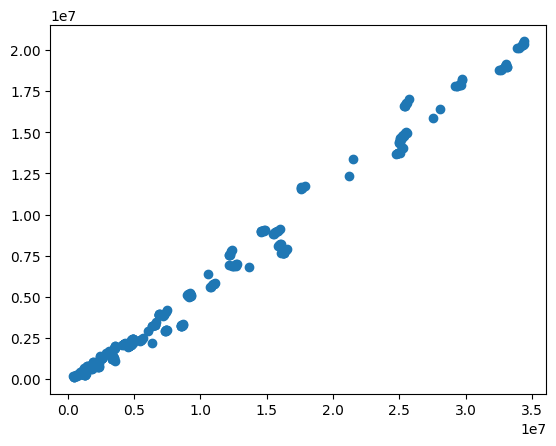

In [73]:
plt.scatter(data_oriente["MediaHistoricaEnergia"], data_oriente["AportesHidricosEnergiaPSS95"])

In [74]:
data.loc[data['CodigoSerieHidrologica'] == 'ALICBOGO', 'RegionHidrologica'] = 'Centro'
data[data['RegionHidrologica']=="Centro"]

,FechaPublicacion,Fecha,CodigoDuracion,CodigoSerieHidrologica,RegionHidrologica,AportesHidricosEnergia,PromedioAcumuladoEnergia,MediaHistoricaEnergia,AportesHidricosEnergiaPSS95
1,2023-11-29,2017-01-01,P1D,SOGASOGA,Centro,12549800.0,12550000.0,6240000.0,2380000.0
3,2023-11-29,2017-01-01,P1D,ALICBOGO,Centro,18579000.0,7700000.0,3490000.0,440000.0
9,2023-11-29,2017-01-01,P1D,EMBAPRAD,Centro,430200.0,430000.0,540000.0,170000.0
26,2023-11-29,2017-01-01,P1D,BETAMAG1,Centro,4826500.0,4830000.0,2010000.0,720000.0
28,2023-11-29,2017-01-01,P1D,AMOYAMOY,Centro,1194100.0,1190000.0,1570000.0,790000.0
...,...,...,...,...,...,...,...,...,...
3326,2024-09-26,2024-09-01,P1D,ALICBOGO,Centro,3347200.0,3350000.0,7980000.0,3490000.0
3329,2024-09-26,2024-09-01,P1D,CUCUCUCU,Centro,281200.0,280000.0,710000.0,370000.0
3336,2024-09-26,2024-09-01,P1D,EMBAPRAD,Centro,177900.0,180000.0,280000.0,90000.0
3340,2024-09-26,2024-09-01,P1D,AMOYAMOY,Centro,769200.0,770000.0,1890000.0,1110000.0


In [75]:
data[data["CodigoSerieHidrologica"]=="ALICBOGO"].isnull().sum()

,0
FechaPublicacion,0
Fecha,0
CodigoDuracion,0
CodigoSerieHidrologica,0
RegionHidrologica,0
AportesHidricosEnergia,0
PromedioAcumuladoEnergia,0
MediaHistoricaEnergia,0
AportesHidricosEnergiaPSS95,0


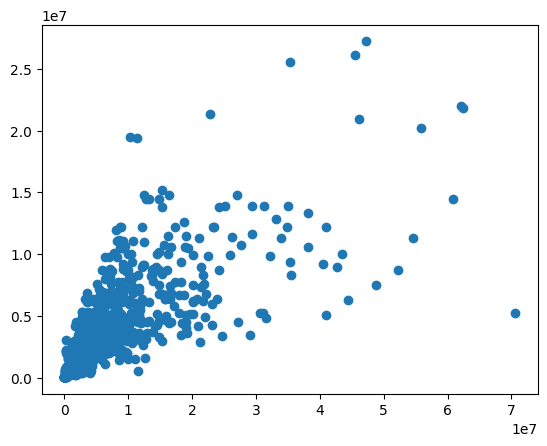

In [76]:
df_ant = df_of[df_of["RegionHidrologica"]=="Antioquia"]
plt.scatter(df_ant["PromedioAcumuladoEnergia"], df_ant["AportesHidricosEnergiaPSS95"])

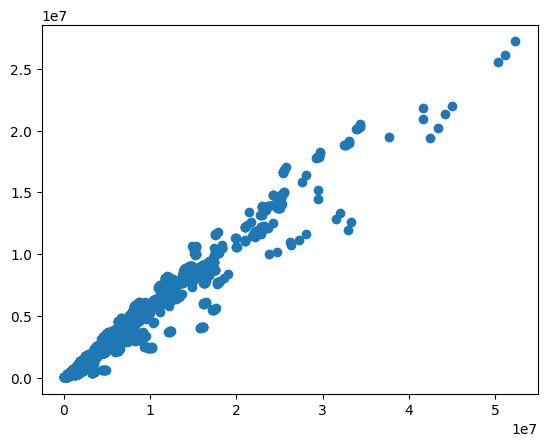

In [77]:
plt.scatter(df_of["MediaHistoricaEnergia"], df_of["AportesHidricosEnergiaPSS95"])

In [78]:
df_of["AportesHidricosEnergia"].max()

72274800.0

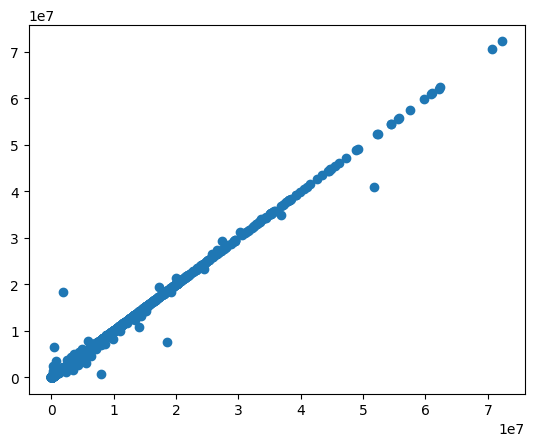

In [79]:
plt.scatter(df_of["AportesHidricosEnergia"], df_of["PromedioAcumuladoEnergia"])

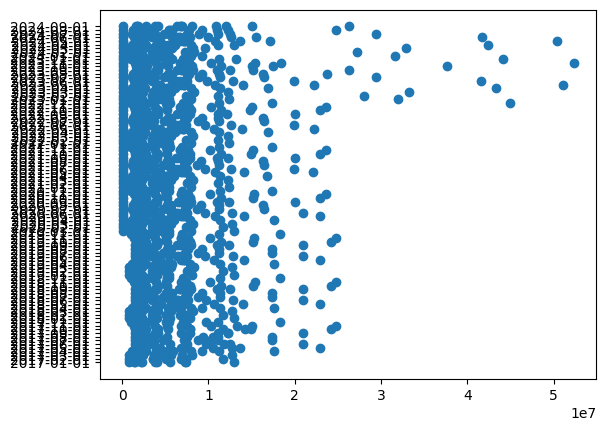

In [80]:
plt.scatter(df_ant["MediaHistoricaEnergia"], df_ant["Fecha"])

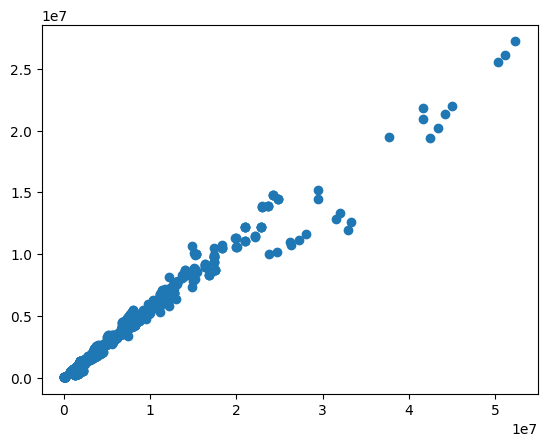

In [81]:
plt.scatter(df_ant["MediaHistoricaEnergia"], df_ant["AportesHidricosEnergiaPSS95"])

array([[<Axes: title={'center': 'AportesHidricosEnergia'}>,
        <Axes: title={'center': 'PromedioAcumuladoEnergia'}>],
       [<Axes: title={'center': 'MediaHistoricaEnergia'}>,
        <Axes: title={'center': 'AportesHidricosEnergiaPSS95'}>]],
      dtype=object)

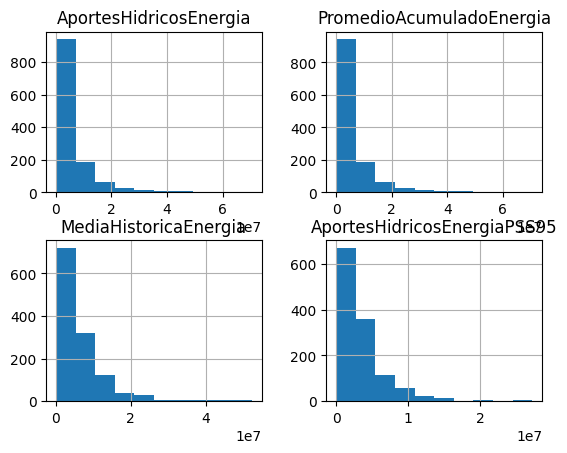

In [82]:
df_ant.hist()

In [83]:
df_of[df_of["RegionHidrologica"]=="Antioquia"].min()

,0
FechaPublicacion,2023-10-12
Fecha,2017-01-01
CodigoDuracion,P1D
CodigoSerieHidrologica,BOCATENC
RegionHidrologica,Antioquia
AportesHidricosEnergia,20600.0
PromedioAcumuladoEnergia,20000.0
MediaHistoricaEnergia,50000.0
AportesHidricosEnergiaPSS95,30000.0


In [84]:
df_of[df_of["RegionHidrologica"]=="Antioquia"].max()

,0
FechaPublicacion,2024-09-26
Fecha,2024-09-01
CodigoDuracion,P1D
CodigoSerieHidrologica,TRONGUAD
RegionHidrologica,Antioquia
AportesHidricosEnergia,70587900.0
PromedioAcumuladoEnergia,70590000.0
MediaHistoricaEnergia,52320000.0
AportesHidricosEnergiaPSS95,27220000.0


,AportesHidricosEnergia
RegionHidrologica,
Antioquia,"Axes(0.125,0.11;0.775x0.77)"
Caldas,"Axes(0.125,0.11;0.775x0.77)"
Caribe,"Axes(0.125,0.11;0.775x0.77)"
Centro,"Axes(0.125,0.11;0.775x0.77)"
Oriente,"Axes(0.125,0.11;0.775x0.77)"
Valle,"Axes(0.125,0.11;0.775x0.77)"


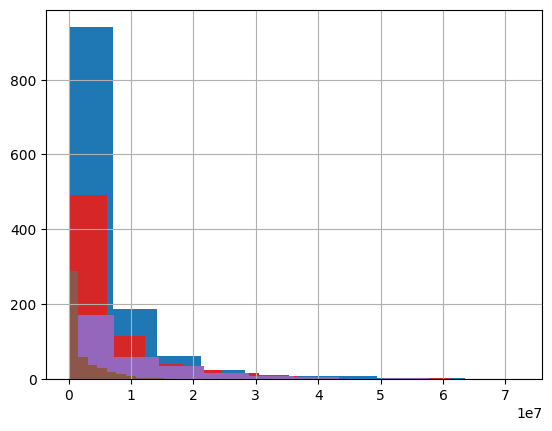

In [85]:
df_fill = df_of.groupby("RegionHidrologica")["AportesHidricosEnergia"]
df_fill.hist()

,0
RegionHidrologica,
Antioquia,"Axes(0.125,0.11;0.775x0.77)"
Caldas,"Axes(0.125,0.11;0.775x0.77)"
Caribe,"Axes(0.125,0.11;0.775x0.77)"
Centro,"Axes(0.125,0.11;0.775x0.77)"
Oriente,"Axes(0.125,0.11;0.775x0.77)"
Valle,"Axes(0.125,0.11;0.775x0.77)"


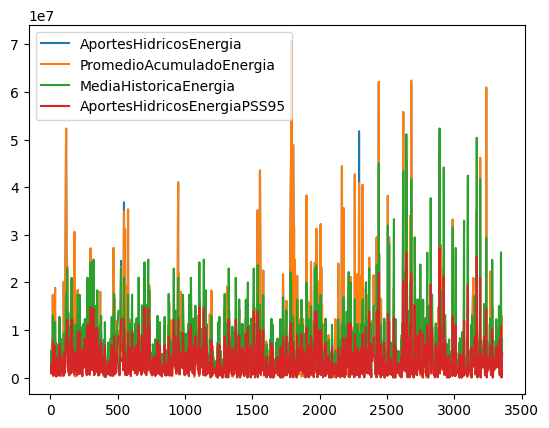

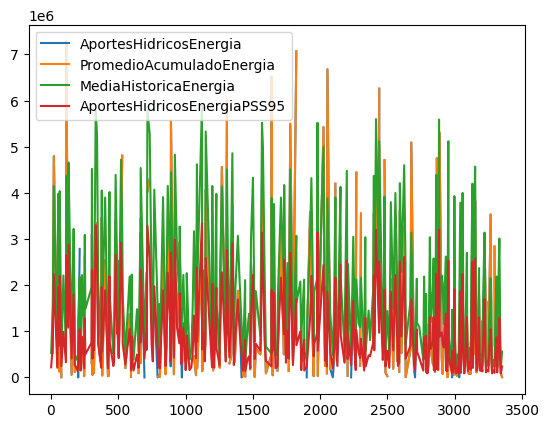

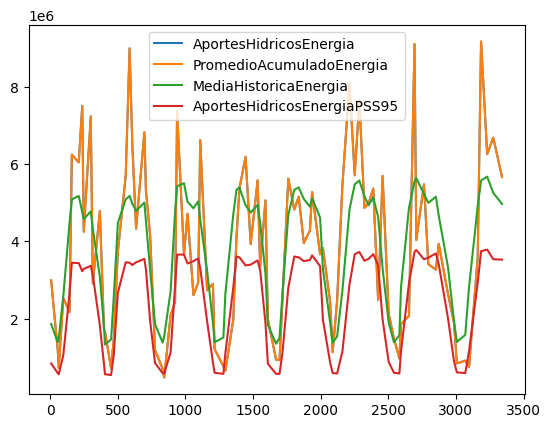

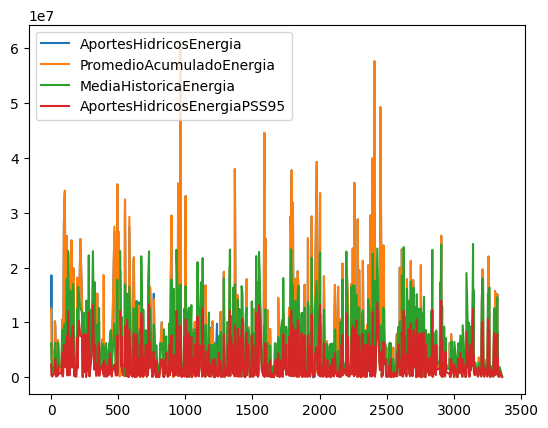

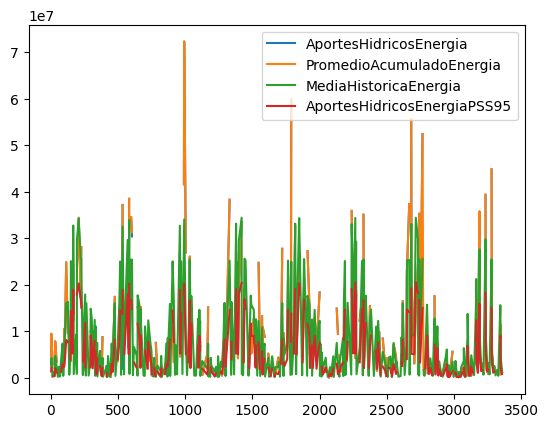

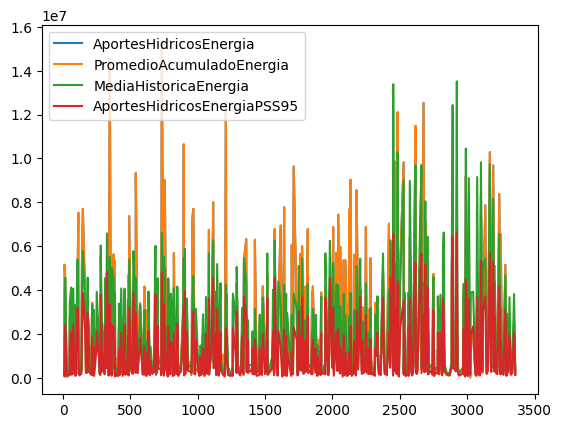

In [86]:
df_fill = df_of.groupby("RegionHidrologica")
df_fill.plot()

,0
RegionHidrologica,
Antioquia,"Axes(0.125,0.11;0.775x0.77)"


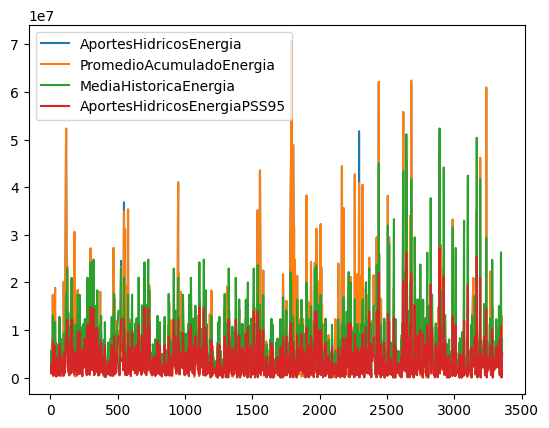

In [87]:
df_fill = df_of[df_of["RegionHidrologica"]=="Antioquia"].groupby("RegionHidrologica")
df_fill.plot()

array([[<Axes: title={'center': 'AportesHidricosEnergia'}>,
        <Axes: title={'center': 'PromedioAcumuladoEnergia'}>],
       [<Axes: title={'center': 'MediaHistoricaEnergia'}>,
        <Axes: title={'center': 'AportesHidricosEnergiaPSS95'}>]],
      dtype=object)

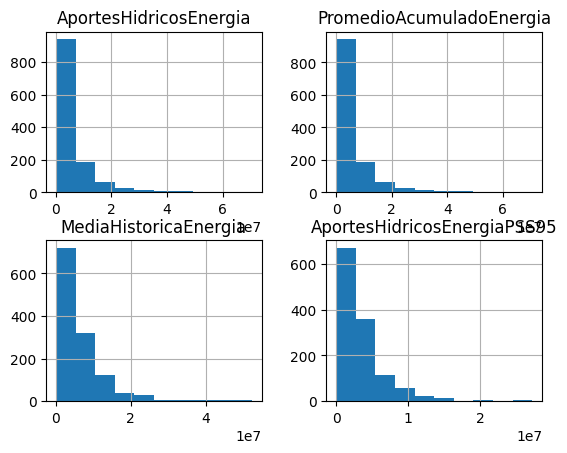

In [88]:
df_of[df_of["RegionHidrologica"]=="Antioquia"].hist()

In [89]:
df_of.to_csv(output_path_file + "Base_oficial__sin_filtro.csv", index=False)